## INITIALIZATION:

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imports from sci-kit learn

from sklearn.model_selection import train_test_split

from sklearn.metrics import mutual_info_score

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## IMPORTING DATASET:

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-10-20 00:31:53--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  2.57MB/s    in 0.5s    

2022-10-20 00:31:54 (2.57 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



## DATA PREPARATION

In [328]:
cols = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']

df = pd.read_csv('housing.csv', usecols = cols)
df.shape

(20640, 10)

In [329]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [330]:
df.info(verbose = True, show_counts = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [331]:
numeric_cols = df.select_dtypes(include=['number']).columns

In [332]:
df = df.fillna(df.median(numeric_only = True))

In [333]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [334]:
df['rooms_per_household'] = df.total_rooms / df.households
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms
df['population_per_household'] = df.population / df.households

## EDA


In [335]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [336]:
numerical = list(df.columns[df.dtypes == float])

categorical = list(df.columns[df.dtypes != float])

## Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

Options:

- NEAR BAY
- <1H OCEAN
- INLAND
- NEAR OCEAN


In [85]:
df.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

<AxesSubplot:xlabel='ocean_proximity', ylabel='Count'>

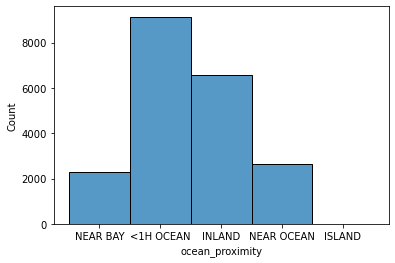

In [86]:
sns.histplot(df.ocean_proximity)

Question 2

- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

Options:

- total_bedrooms and households
- total_bedrooms and total_rooms
- population and households
- population_per_household and total_rooms


In [110]:
corr = df[numerical].corr()

corr[corr !=1].max()

longitude                   0.099773
latitude                    0.106389
housing_median_age          0.135622
total_rooms                 0.927058
total_bedrooms              0.974366
population                  0.907222
households                  0.974366
median_income               0.688075
median_house_value          0.688075
rooms_per_household         0.326895
bedrooms_per_room           0.135622
population_per_household    0.069863
dtype: float64

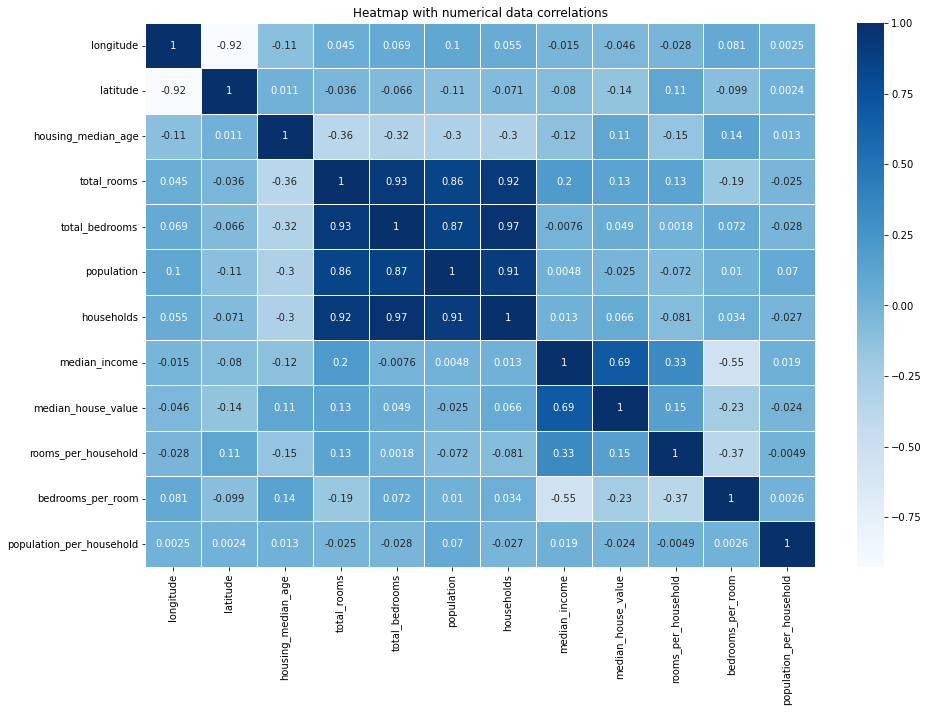

In [120]:
plt.figure(figsize = (15,10))

sns.heatmap(df[numerical].corr(), annot = True, linewidths = .5, cmap = 'Blues')
plt.title('Heatmap with numerical data correlations')
plt.show()

In [122]:
#@ INSPECTING CORRELATION:
df[numerical].corr().unstack().sort_values(ascending = False)[:15]

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_house_value        median_house_value          1.000000
median_income             median_income               1.000000
households                households                  1.000000
population                population                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.974366
households                total_bedrooms              0.974366
total_bedrooms            total_rooms                 0.927058
dtype: float64

### Make median_house_value binary

- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [197]:
data = df.copy()

above_average = np.array((data.median_house_value > data.median_house_value.mean()))

data['above_average'] = above_average

In [198]:
# Or
mean = data['median_house_value']
np.where(data['median_house_value']>=mean,1,0)

array([1, 1, 1, ..., 1, 1, 1])

### Split the data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [199]:
# Preprocess the dataset drop the house price that we converted to binary

data = data.drop('median_house_value', axis = 1)

In [200]:
# Split the data

df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [201]:
# Reset indices

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [202]:
# Get target variables
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# del df_train['above_average']
# del df_val['above_average']
# del df_test['above_average']

## Question 3

- Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
- Round it to 2 decimals using round(score, 2)
- What is their mutual information score?

Options:

- 0.26
- 0
- 0.10
- 0.16


In [203]:
mi_score = mutual_info_score(df_train.above_average, df_train.ocean_proximity)

round(mi_score, 2)

0.1

In [204]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

#@ DEFINING FUNCTION:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

#@ IMPLEMENTATION:
df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
ocean_proximity,0.101384


## Question 4

- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

- 0.60
- 0.72
- 0.84
- 0.95


### Drop the target !!!

In [238]:
#@ PREPARING THE DATASET:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

### One-hot encoding

In [270]:
numerical = list(df_train.columns[df_train.dtypes == float])

categorical = list(df_train.columns[df_train.dtypes != float])

In [271]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [272]:
# Initialize
dv = DictVectorizer(sparse = False)

# Fit
dv.fit(train_dicts)

# Use
X_train = dv.transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

### Logistic regression

In [244]:
# Set model
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [245]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [246]:
y_pred = model.predict(X_val)

In [249]:
accuracy_all_feat = round((y_val == y_pred).mean(), 2)

accuracy_all_feat

0.84

## Question 5

- Let's find the least useful feature using the **feature elimination technique**.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - total_rooms
    - total_bedrooms
    - population
    - households

Note: the difference doesn't have to be positive

In [280]:
features = (numerical + categorical)

for feat in features:
    
    subset = features.copy()
    subset.remove(feat)

    train_dicts = df_train[subset].to_dict(orient = 'records')

    val_dicts = df_val[subset].to_dict(orient = 'records')

    # Initialize
    dv = DictVectorizer(sparse = False)

    # Fit
    dv.fit(train_dicts)

    # Use
    X_train = dv.transform(train_dicts)

    X_val = dv.transform(val_dicts)

    # Set model
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    
    print(feat, accuracy_all_feat - score, score)
    

longitude 0.00642441860465115 0.8335755813953488
latitude 0.005939922480620141 0.8340600775193798
housing_median_age 0.010058139534883659 0.8299418604651163
total_rooms 0.0032751937984495383 0.8367248062015504
total_bedrooms 0.003517441860465098 0.8364825581395349
population 0.013691860465116279 0.8263081395348837
households 0.006908914728682158 0.8330910852713178
median_income 0.05463178294573645 0.7853682170542635
rooms_per_household 0.004001937984496107 0.8359980620155039
bedrooms_per_room 0.004970930232558124 0.8350290697674418
population_per_household 0.003517441860465098 0.8364825581395349
ocean_proximity 0.0204748062015504 0.8195251937984496


Total rooms has the smallest difference total_rooms 0.0032751937984495383 0.8367248062015504

## Question 6

- For this question, we'll see how to use a **linear regression model** from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

Options:

- 0
- 0.01
- 0.1
- 1
- 10


In [320]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.604042,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.602940,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.602854,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.602704,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.602717,NEAR BAY,6.281853,0.172096,2.181467


In [337]:
data = df

data['median_house_value'] = np.log1p(data['median_house_value'])

In [338]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY,6.281853,0.172096,2.181467


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

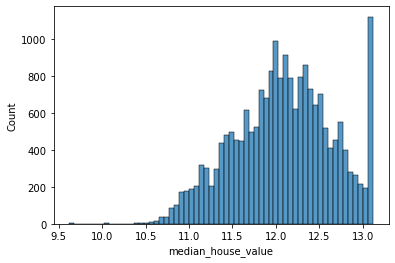

In [339]:
sns.histplot(data.median_house_value)

In [340]:
df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)


# Reset indices

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

# Get target
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [342]:
## Vectorizer

train_dicts = df_train.to_dict(orient = 'records')

val_dicts  = df_val.to_dict(orient = 'records')

dv = DictVectorizer()

dv.fit(train_dicts)

X_train = dv.transform(train_dicts)

X_val = dv.transform(val_dicts)

In [344]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(rmse, 4))

/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(


0 0.5249


/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(


0.01 0.5249


/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(


0.1 0.5249


/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(


1 0.5249


/home/giorgos/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:729: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(


10 0.5249


**Since all the scores are equal we are going to use alpha=0, smallest alpha**